# Imports and definitions

In [1]:
from XRDXRFutils.notebook_utils import *
from utility_functions import *


### Size of the detector ###
n_channels = 1280
length_channel = 50 * 10**(-4)   # in cm
width_channel = 0.8
L = n_channels * length_channel   # length of the detector


### Output ###
path_figures = 'figures/'
paths_to_create_delete = [path_figures]

#### To reset results, delete output folders.
WARNING: every previous result will be lost. Use only if you want to delete all files in the data folders

In [2]:
do_you_want_to_delete = False
if do_you_want_to_delete:
    for path_sel in paths_to_create_delete:
        if isdir(path_sel):
            rmtree(path_sel)

#### Check if output folders exist. If not, create them.

In [3]:
for path_sel in paths_to_create_delete:
    if not isdir(path_sel):
        makedirs(path_sel)

# Geometry of the system

### Detector

In [4]:
### Geometry of the detector (misure Giulia) ###
#theta_min = 22.00
#theta_max = 72.68
#beta = 33.93

### Geometry of the detector (standard) ###
theta_min = 16
theta_max = 44
beta = 42

### Geometry of the detector (Venere) ###
#theta_min = 16.13
#theta_max = 44.17
#beta = 42.05   # Orientation of the detector

### Geometry of the detector (Oslo) ###
#theta_min = 19.78
#theta_max = 53.58
#beta = 51.66   # Orientation of the detector

a, s = a_s_from_beta(beta, L, theta_min, theta_max)

### Beam

In [10]:
### Geometry of the beam (misure Giulia) ###
#incident = 10   # Incident angle
#d = 2.9   # Distance between sample and focus of the source
#sigma_omega = 0.78   # Angular disperion of the beam (direction 1)
#sigma_psi = 0.78   # Angular disperion of the beam (direction 2)


### Geometry of the beam (standard) ###
incident = 10.5   # Incident angle
d = 2.9   # Distance between sample and focus of the source
sigma_omega = 0.001 #0.02 # Angular disperion of the beam (direction 1)
sigma_psi = 0.001 #0.78   # Angular disperion of the beam (direction 2)

print(f'd = {d} cm')
footprint_omega = 2 * d * deg2rad(sigma_omega) / sin(deg2rad(incident))
footprint_psi = 2 * d * tan(deg2rad(sigma_psi))
print(f'Ray footprint – half (omega): {footprint_omega / 2:.3} cm')
print(f'Ray footprint – half (psi): {footprint_psi / 2:.3} cm')

d = 2.9 cm
Ray footprint – half (omega): 0.000278 cm
Ray footprint – half (psi): 5.06e-05 cm


### Plot positions

a, s = -5.972, 12.245
beta = 42
d/L = 0.453
d = 2.900 cm
i = 10.5
theta = 30


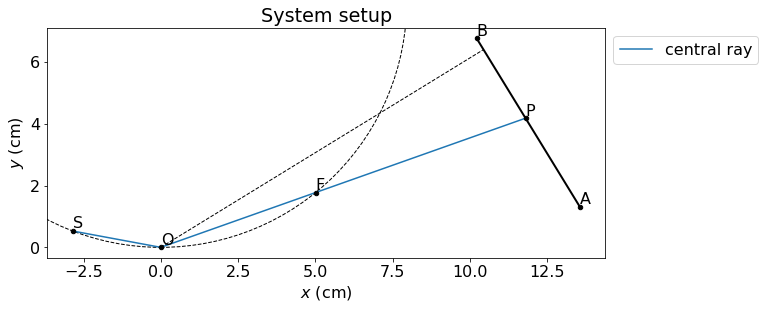

Df = 7.207 cm
Dp = 0.086 cm (17.189 channels)
Dtheta = 0.385 deg


In [11]:
omega_plot = 0.67   # Deviation angle of the followed secondary ray

### Diffraction ###
#theta = (theta_min + theta_max) / 2
theta = 30

### Plot ###
rcParams['font.size'] = 16
plot_secondary_ray = False

###

print(f'a, s = {a:.3f}, {s:.3f}')
print(f'beta = {beta}')
print(f'd/L = {d/L:.3f}')
print(f'd = {d:.3f} cm')
print(f'i = {incident}')
print(f'theta = {theta}')

### Figure ###
fig, ax = subplots(figsize = (10, 10))
plot_experimental_setting(L, a, s, beta, incident, d, omega_plot, theta, ax, legend = True, secondary_ray = plot_secondary_ray)
show()

Delta_f, Delta_p, Delta_theta = error_defocus(theta, a, s, beta, incident, d, omega_plot)
print(f'Df = {Delta_f:.3f} cm')
print(f'Dp = {Delta_p:.3f} cm ({Delta_p / length_channel:.3f} channels)')
print(f'Dtheta = {Delta_theta:.3f} deg')

### Plot diffraction conic

theta = 30 deg
p(P') = 3.370 cm
p(P'') = 3.369 cm
p(D') = 3.358 cm
p(D'') = 3.358 cm
Delta p = 0.005795926538723517 cm
Delta p = 0.005795926538723517 cm


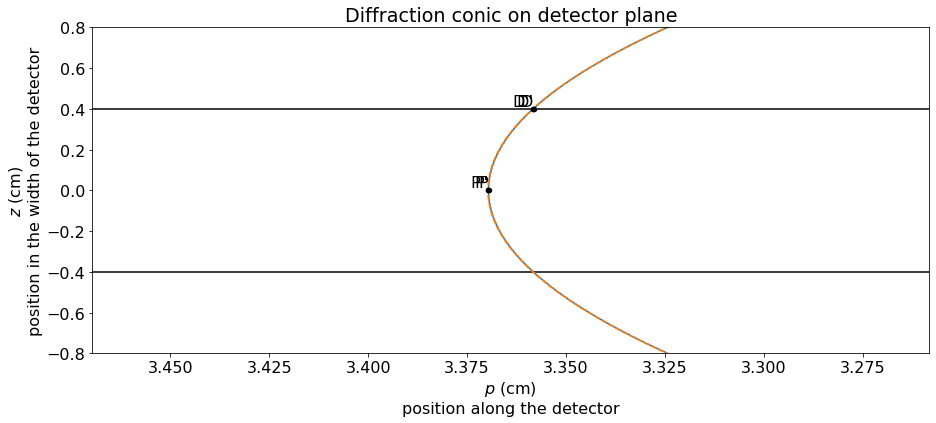

In [12]:
sigma_omega_plot = sigma_omega #0.67   # Angular disperion of the beam (direction 1)
sigma_psi_plot = sigma_psi   # Angular disperion of the beam (direction 2)

### Calculate intersection curve ###
arr_z = arange(- 20 * width_channel, 20 * width_channel, 0.0001)
arr_p = conic_diffraction_base(arr_z, theta, a, s, beta)
Delta_z = ( d + s / cos(deg2rad(theta - beta)) ) * tan(deg2rad(sigma_psi_plot))
arr_p1 = conic_diffraction(arr_z, theta, a, s, beta, d, incident, sigma_omega_plot, -sigma_psi_plot)
arr_p2 = conic_diffraction(arr_z, theta, a, s, beta, d, incident, -sigma_omega_plot, -sigma_psi_plot)

### Calculate coordinates and distances ###
x_P = angle_to_distance(theta, a, s, beta)
x_D = conic_diffraction_base(width_channel/2, theta, a, s, beta)[0]
x_P1 = conic_diffraction(0, theta, a, s, beta, d, incident, sigma_omega_plot, 0)[0]
x_D1 = conic_diffraction(width_channel/2, theta, a, s, beta, d, incident, sigma_omega_plot, -sigma_psi_plot)[0]
x_P2 = conic_diffraction(0, theta, a, s, beta, d, incident, -sigma_omega_plot, 0)[0]
x_D2 = conic_diffraction(width_channel/2, theta, a, s, beta, d, incident, -sigma_omega_plot, -sigma_psi_plot)[0]
Delta_p = 0.5 * (max(x_P1, x_D1, x_P2, x_D2) - min(x_P1, x_D1, x_P2, x_D2))
Delta_p_alt, _ = error_defocus_and_cone(width_channel, theta, a, s, beta, d, incident, sigma_omega_plot, sigma_psi_plot)

print(f'theta = {theta} deg')
print(f'p(P\') = {x_P1:.3f} cm')
print(f'p(P\'\') = {x_P2:.3f} cm')
print(f'p(D\') = {x_D1:.3f} cm')
print(f'p(D\'\') = {x_D2:.3f} cm')
print(f'Delta p = {Delta_p} cm')
print(f'Delta p = {Delta_p_alt} cm')

### Plot ###
fig, ax = subplots(figsize = (15, 6))
ax.plot([0, 0], [- width_channel/2, width_channel/2], c = 'black')
ax.plot([L, L], [- width_channel/2, width_channel/2], c = 'black')
ax.plot([0, L], [- width_channel/2, - width_channel/2], c = 'black')
ax.plot([0, L], [width_channel/2, width_channel/2], c = 'black')
ax.plot(arr_p[0], arr_z, c = 'tab:blue')
ax.plot(arr_p[1], arr_z, c = 'tab:blue')
ax.plot(arr_p1[0], arr_z, ls = '--', c = 'tab:orange')
ax.plot(arr_p2[0], arr_z, ls = ':', c = 'tab:orange')

ax.scatter(0, 0, c = 'black', s = 20, zorder = 2.5)
ax.annotate('A', (0, 0), ha = 'left', va = 'bottom')
ax.scatter(n_channels * length_channel, 0, c = 'black', s = 20, zorder = 2.5)
ax.annotate('B', (n_channels * length_channel, 0), ha = 'right', va = 'bottom')
list_letters = ['P', 'D', 'P\'', 'D\'', 'P\'\'', 'D\'\'']
list_coords = [(x_P, 0), (x_D, width_channel/2), (x_P1, -Delta_z), (x_D1, width_channel/2), (x_P2, -Delta_z), (x_D2, width_channel/2)]
for letter, coords in zip(list_letters, list_coords):
    ax.scatter(*coords, c = 'black', s = 20, zorder = 2.5)
    ax.annotate(letter, coords, ha = 'right', va = 'bottom')

#ax.set_aspect(1)
x_lim_complete = n_channels * length_channel * array([- 0.1, 1.1])
if (not isnan(x_D2)):
    x_lim_narrow = (x_D2 - 0.1, x_P1 + 0.1)
else:
    x_lim_narrow = (- 0.1 * n_channels * length_channel, x_P1 + 0.05)
#ax.set_xlim(n_channels * length_channel * array([- 0.1, 1.1]))
#ax.set_ylim(- 2 * width_channel, 2 * width_channel)
ax.set_xlim(x_lim_narrow)
ax.set_ylim(- 1 * width_channel, 1 * width_channel)

ax.invert_xaxis()
ax.set_xlabel(r'$p$ (cm)' + '\nposition along the detector')
ax.set_ylabel(r'$z$ (cm)' + '\nposition in the width of the detector')
ax.set_title('Diffraction conic on detector plane')
show()

# Angular error produced by defocus

### Geometry and defocus in the detector for varying $d$

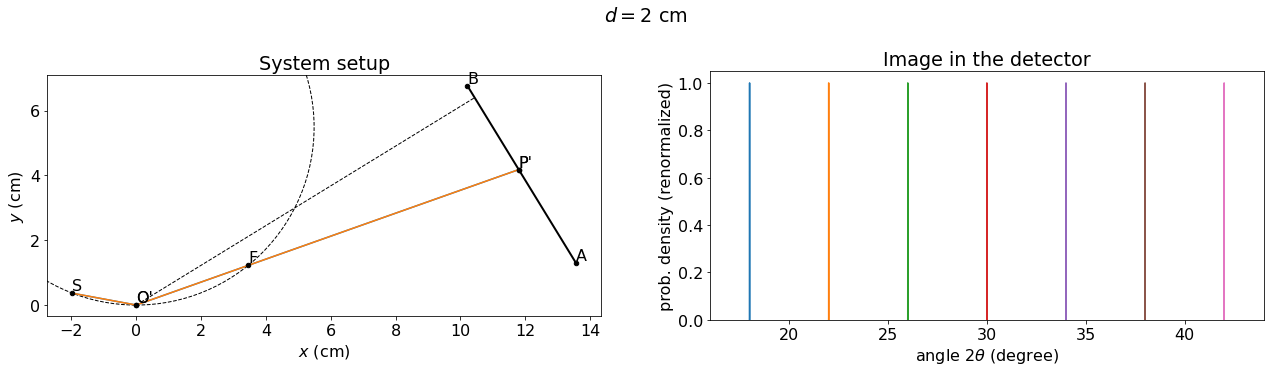

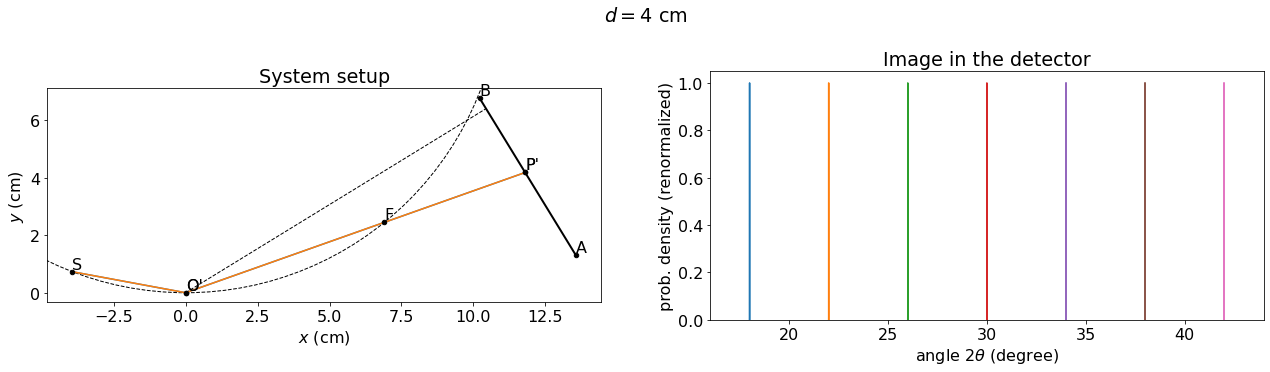

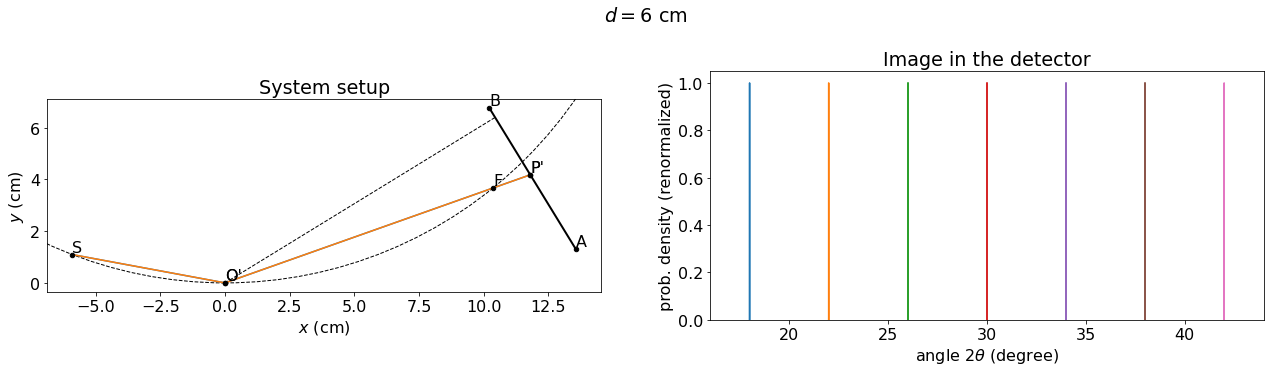

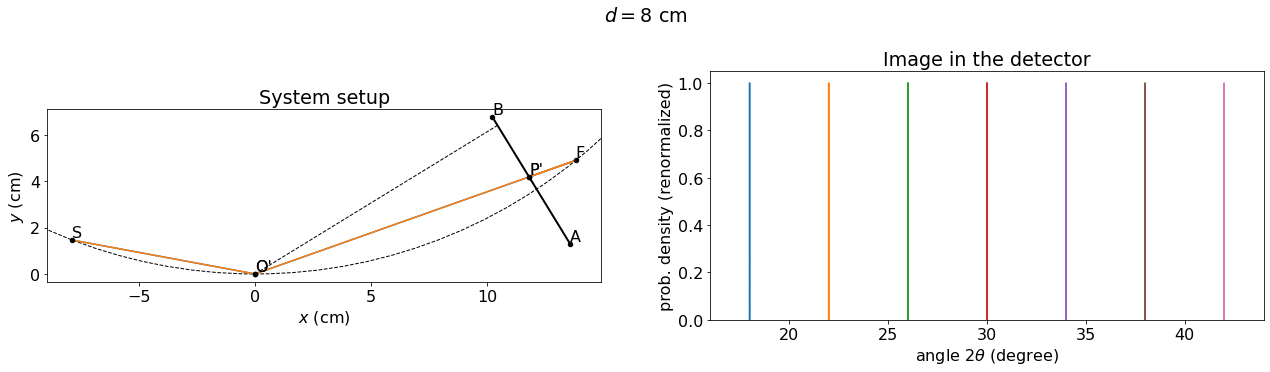

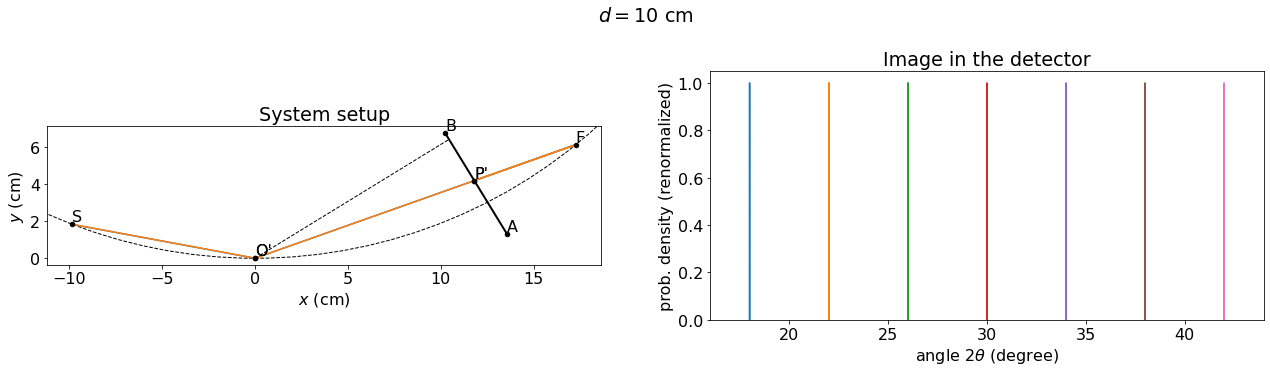

In [13]:
beta_plot = beta
sigma_omega_plot = sigma_omega
list_d = list(range(2, 11, 2))   # Distance between detector and focus of the source

# Plot
rcParams['font.size'] = 16
plot_theta = True   # If true, plot diffraction peaks in theta; otherwise, plot them in channels

###
# Varying: d, theta (--> channel), omega

# Orientation of the detector
a, s = a_s_from_beta(beta_plot, L, theta_min, theta_max)
# Distance of the source
arr_d = expand_dims(array(list_d), axis = [1, 2])
# Channels and angles in the detector
arr_theta = expand_dims(arange(theta_min + 2, theta_max, 4), axis = [0, 2])
arr_channel = angle_to_channel(arr_theta, a, s, beta_plot, length_channel)
# Distribution of rays
arr_omega = expand_dims(linspace(- 4 * sigma_omega_plot, 4 * sigma_omega_plot, 500), axis = [0, 1])
arr_gaussian = squeeze( exp(- power(arr_omega, 2) / (2 * power(sigma_omega_plot, 2))) )

# Calculation of errors
Delta_f, Delta_p, Delta_theta = error_defocus(arr_theta, a, s, beta_plot, incident, arr_d, arr_omega)
arr_channels_disp = arr_channel + (Delta_p / length_channel)
arr_theta_disp = arr_theta + Delta_theta

###

for idx_d, d_plot in enumerate(arr_d.flatten()):
    fig, axs = subplots(1, 2, figsize = (18, 5))
    fig.tight_layout(w_pad = 4)
    fig.subplots_adjust(top = 0.8)   # To shift the title
    
    ax = axs[0]
    theta = (theta_min + theta_max) / 2
    plot_experimental_setting(L, a, s, beta_plot, incident, d_plot, sigma_omega_plot, theta, ax, legend = False)
    
    ax = axs[1]
    for idx_theta, theta in enumerate(arr_theta.flatten()):
        if plot_theta:
            ax.plot(arr_theta_disp[idx_d, idx_theta, :], arr_gaussian)
            ax.set_xlim(theta_min, theta_max)
            ax.set_xlabel(r'angle $2 \theta$ (degree)')
        else:
            ax.plot(arr_channels_disp[idx_d, idx_theta, :], arr_gaussian)
            ax.set_xlim(0, n_channels)
            ax.set_xlabel('channel')
        ax.set_ylim(0, None)
        ax.set_ylabel('prob. density (renormalized)')
        ax.set_title('Image in the detector')

    fig.suptitle(r'$d = $' + f'{d_plot} cm')
    show()

### Error for varying $d$

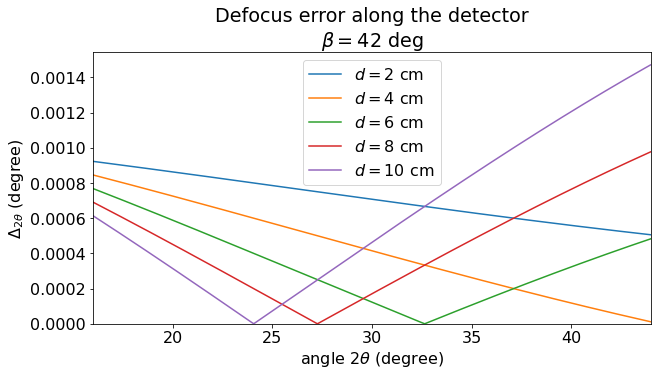

In [14]:
beta_plot = beta
sigma_omega_plot = sigma_omega
list_d = list(range(2, 11, 2))   # Distance between detector and focus of the source

rcParams['font.size'] = 16

###
# Varying: d, theta (--> channel), omega

# Orientation of the detector
a, s = a_s_from_beta(beta_plot, L, theta_min, theta_max)
# Distance of the source
arr_d = expand_dims(array(list_d), axis = [1, 2])
# Channels and angles in the detector
arr_channel = expand_dims(arange(0, n_channels, 1), axis = [0, 2])
arr_theta = channel_to_angle(arr_channel, a, s, beta_plot, length_channel)
# Distribution of rays
arr_omega = expand_dims([-sigma_omega_plot, sigma_omega_plot], axis = [0, 1])

# Calculation of errors
Delta_f, Delta_p, Delta_theta = error_defocus(arr_theta, a, s, beta_plot, incident, arr_d, arr_omega)
arr_error = average(absolute(Delta_theta), axis = 2)

fig, ax = subplots(figsize = (10, 5))
for idx_d, d_plot in enumerate(arr_d.flatten()):
    ax.plot(arr_theta.flatten(), arr_error[idx_d, :], label = r'$d = $' + f'{d_plot} cm')
ax.legend(frameon = True)
ax.set_xlim(theta_min, theta_max)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2 \theta$ (degree)')
ax.set_ylabel(r'$\Delta_{2\theta}$ (degree)')
ax.set_title('Defocus error along the detector\n' + r'$\beta = $' + f'{beta_plot} deg')
show()

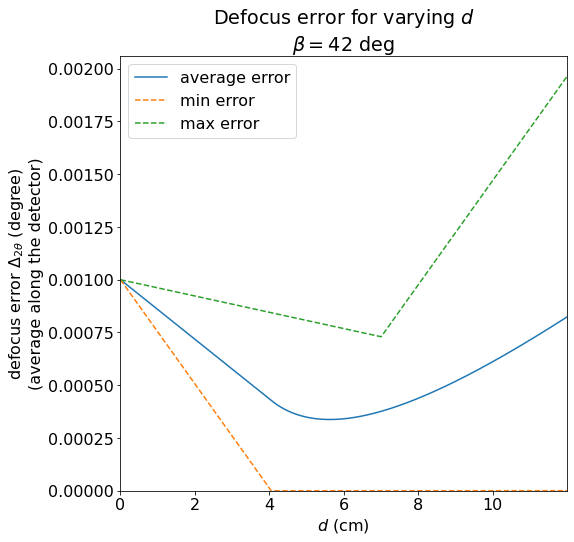

In [15]:
rcParams['font.size'] = 16

beta_plot = beta
sigma_omega_plot = sigma_omega
d_min, d_max, d_step = 0, 12, 0.01   # d (distance of the focus of the source / length of the detector)

###
# Varying: d, theta (--> channel), omega

# Orientation of the detector
a, s = a_s_from_beta(beta_plot, L, theta_min, theta_max)
# Distance of the source
arr_d = expand_dims(arange(d_min, d_max, d_step), axis = [1, 2])
# Channels and angles in the detector
arr_channel = expand_dims(arange(0, n_channels, 1), axis = [0, 2])
arr_theta = channel_to_angle(arr_channel, a, s, beta_plot, length_channel)
# Distribution of rays
arr_omega = expand_dims([-sigma_omega_plot, sigma_omega_plot], axis = [0, 1])

# Calculation of errors
Delta_f, Delta_p, Delta_theta = error_defocus(arr_theta, a, s, beta_plot, incident, arr_d, arr_omega)
arr_error = absolute(Delta_theta).mean(axis = 2)
arr_error_avg = arr_error.mean(axis = 1)
arr_error_min = arr_error.min(axis = 1)
arr_error_max = arr_error.max(axis = 1)

fig, ax = subplots(figsize = (8, 8))
ax.plot(arr_d.flatten(), arr_error_avg, label = 'average error')
ax.plot(arr_d.flatten(), arr_error_min, ls = '--', label = 'min error')
ax.plot(arr_d.flatten(), arr_error_max, ls = '--', label = 'max error')
ax.legend(frameon = True)
ax.set_xlim(arr_d.flatten()[[0, -1]])
ax.set_ylim(0, None)
ax.set_xlabel(r'$d$ (cm)')
ax.set_ylabel('defocus error ' + r'$\Delta_{2\theta}$ (degree)' + '\n(average along the detector)')
ax.set_title(r'Defocus error for varying $d$' + '\n' + r'$\beta = $' + f'{beta_plot} deg')
show()

### Error for varying $\beta$

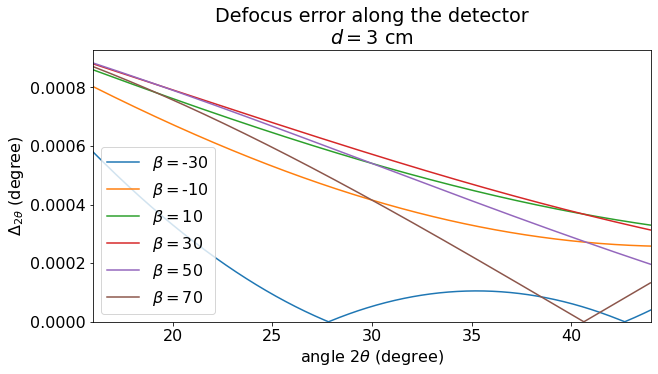

In [16]:
rcParams['font.size'] = 16

d_plot = 3   # Distance between detector and focus of the source
sigma_omega_plot = sigma_omega
list_beta = list(range(-30, 90, 20))   # Orientation of the detector


###
# Varying: beta (--> a, s), theta (--> channel), omega

# Orientation of the detector
arr_beta = expand_dims(array(list_beta), axis = [1, 2])
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
# Channels and angles in the detector
arr_channel = expand_dims(arange(0, n_channels, 1), axis = [0, 2])
arr_theta = channel_to_angle(arr_channel, arr_a, arr_s, arr_beta, length_channel)
# Distribution of rays
arr_omega = expand_dims([-sigma_omega_plot, sigma_omega_plot], axis = [0, 1])

# Calculation of errors
Delta_f, Delta_p, Delta_theta = error_defocus(arr_theta, arr_a, arr_s, arr_beta, incident, d_plot, arr_omega)
arr_error = average(absolute(Delta_theta), axis = 2)

fig, ax = subplots(figsize = (10, 5))
for idx_beta, beta_plot in enumerate(arr_beta.flatten()):
    ax.plot(arr_theta[idx_beta].flatten(), arr_error[idx_beta, :], label = r'$\beta = $' + f'{beta_plot}')
ax.legend(frameon = True)
ax.set_xlim(theta_min, theta_max)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2 \theta$ (degree)')
ax.set_ylabel(r'$\Delta_{2\theta}$ (degree)')
ax.set_title('Defocus error along the detector\n' + r'$d = $' + f'{d_plot} cm')
show()

### Colour map

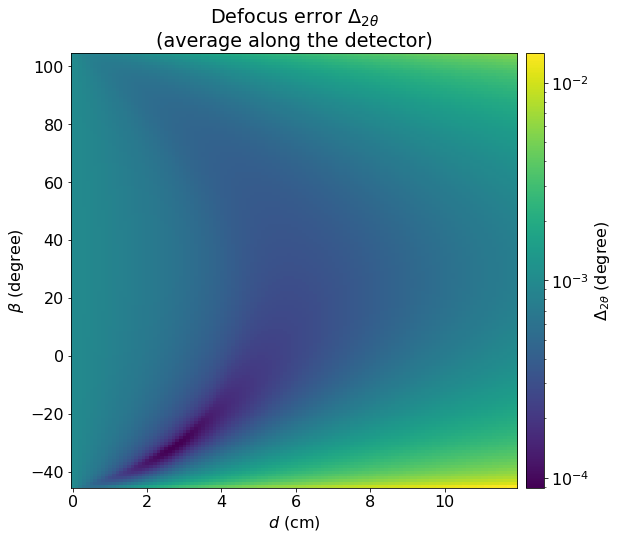

In [17]:
rcParams['font.size'] = 16

#beta_min, beta_max, beta_step = -40, 90, 1   # Orientation of the detector
beta_min, beta_max, beta_step = theta_max - 89, theta_min + 89, 1
d_min, d_max, d_step = 0, 12, 0.1   # d (distance of the focus of the source / length of the detector)

###

arr_beta = expand_dims(arange(beta_min, beta_max, beta_step), axis = [1, 2, 3])
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
arr_d = expand_dims(arange(d_min, d_max, d_step), axis = [0, 2, 3])
arr_channel = expand_dims(arange(0, n_channels, 5), axis = [0, 1, 3])
arr_theta = channel_to_angle(arr_channel, arr_a, arr_s, arr_beta, length_channel)
arr_omega = expand_dims([-sigma_omega, sigma_omega], axis = [0, 1, 2])
Delta_f, Delta_p, Delta_theta = error_defocus(arr_theta, arr_a, arr_s, arr_beta, incident, arr_d, arr_omega)

arr_error = average(absolute(Delta_theta), axis = (2, 3))

fig, ax = subplots(figsize = (8, 8))
im = ax.imshow(arr_error,
               norm = LogNorm(),
               extent = (d_min - d_step/2, d_max - d_step/2, beta_min - beta_step/2, beta_max - beta_step/2),
               aspect = 'auto', interpolation = 'none')
cb = colorbar(im, ax = ax, cax = ax.inset_axes([1.02,0, 0.04, 1]), label = r'$\Delta_{2\theta}$ (degree)')
cb.ax.yaxis.set_offset_position('left')
#ax.set_xlabel(r'$d/L$')
ax.set_xlabel(r'$d$ (cm)')
ax.set_ylabel(r'$\beta$ (degree)')
ax.set_title('Defocus error ' + r'$\Delta_{2\theta}$' + '\n(average along the detector)')
show()

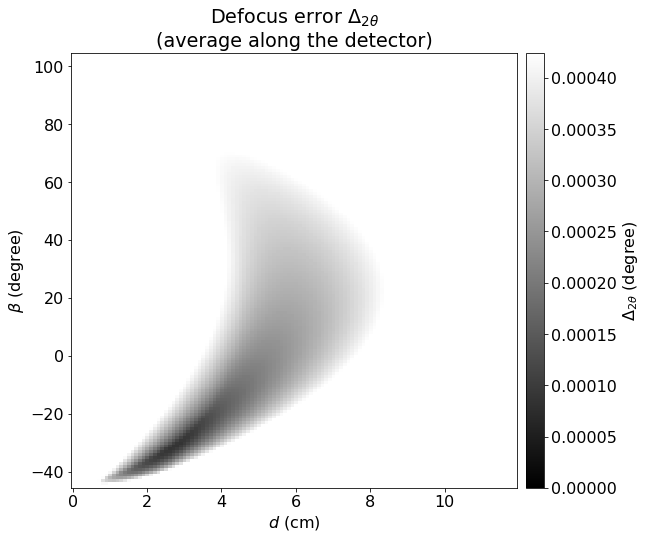

In [18]:
fig, ax = subplots(figsize = (8, 8))

im = ax.imshow(arr_error,
               extent = (d_min - d_step/2, d_max - d_step/2, beta_min - beta_step/2, beta_max - beta_step/2),
               aspect = 'auto', interpolation = 'none', cmap = 'gray',
               vmin = 0, vmax = 0.03 * arr_error.max())

cb = colorbar(im, ax = ax, cax = ax.inset_axes([1.02,0, 0.04, 1]), label = r'$\Delta_{2\theta}$ (degree)')
cb.ax.yaxis.set_offset_position('left')
ax.set_xlabel(r'$d$ (cm)')
ax.set_ylabel(r'$\beta$ (degree)')
ax.set_title('Defocus error ' + r'$\Delta_{2\theta}$' + '\n(average along the detector)')
show()

In [19]:
arr_error.min()

8.871127030942001e-05

# Angular error produced by diffraction cone

### Error for varying $\beta$

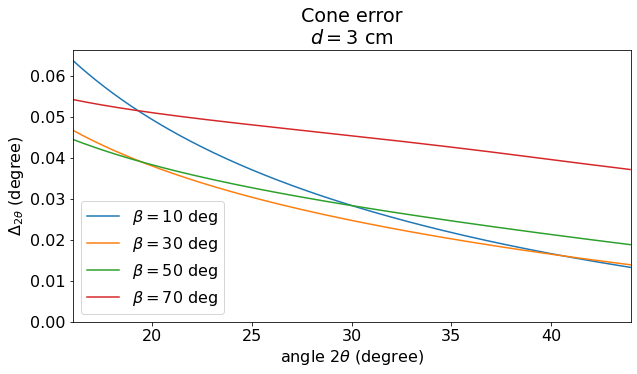

In [20]:
rcParams['font.size'] = 16

d_plot = 3   # Distance between detector and focus of the source
sigma_omega_plot = sigma_omega
#list_beta = list(range(-30, 90, 20))   # Orientation of the detector
list_beta = list(range(10, 90, 20))   # Orientation of the detector

###
# Varying: beta (--> a, s), theta (--> channel)

arr_beta = expand_dims(array(list_beta), axis = [1])
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
arr_channel = expand_dims(arange(0, n_channels, 1), axis = [0])
arr_theta = channel_to_angle(arr_channel, arr_a, arr_s, arr_beta, length_channel)

Delta_p, Delta_theta = error_defocus_and_cone(width_channel, arr_theta, arr_a, arr_s, arr_beta, d_plot, incident, sigma_omega_plot, sigma_psi)
arr_error = Delta_theta

fig, ax = subplots(figsize = (10, 5))
for idx_beta, beta_plot in enumerate(arr_beta.flatten()):
    ax.plot(arr_theta[idx_beta].flatten(), arr_error[idx_beta, :], label = r'$\beta = $' + f'{beta_plot} deg')
ax.legend(frameon = True)
ax.set_xlim(theta_min, theta_max)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2 \theta$ (degree)')
ax.set_ylabel(r'$\Delta_{2\theta}$ (degree)')
ax.set_title('Cone error\n' + r'$d = $' + f'{d_plot} cm')
show()

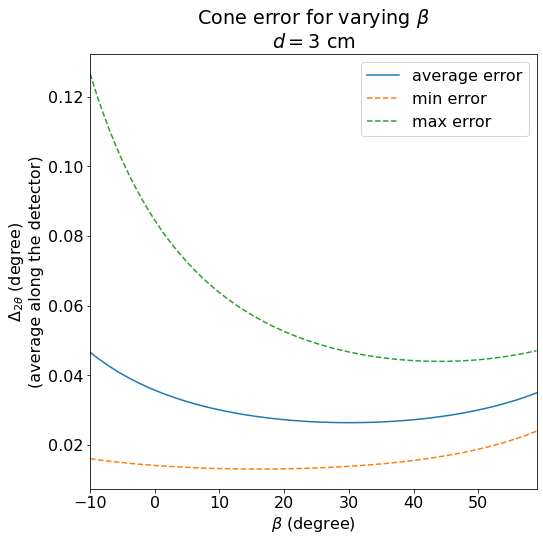

In [21]:
rcParams['font.size'] = 16

d_plot = 3   # Distance between detector and focus of the source
sigma_omega_plot = sigma_omega
#beta_min, beta_max, beta_step = theta_max - 89, theta_min + 89, 1
beta_min, beta_max, beta_step = - 10, 60, 1

###
# Varying: beta (--> a, s), theta (--> channel)

arr_beta = expand_dims(arange(beta_min, beta_max, beta_step), axis = [1])
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
arr_channel = expand_dims(arange(0, n_channels, 1), axis = [0])
arr_theta = channel_to_angle(arr_channel, arr_a, arr_s, arr_beta, length_channel)

Delta_p, Delta_theta = error_defocus_and_cone(width_channel, arr_theta, arr_a, arr_s, arr_beta, d_plot, incident, sigma_omega_plot, sigma_psi)
arr_error_avg = Delta_theta.mean(axis = 1)
arr_error_min = Delta_theta.min(axis = 1)
arr_error_max = Delta_theta.max(axis = 1)

fig, ax = subplots(figsize = (8, 8))
ax.plot(arr_beta.flatten(), arr_error_avg, label = 'average error')
ax.plot(arr_beta.flatten(), arr_error_min, ls = '--', label = 'min error')
ax.plot(arr_beta.flatten(), arr_error_max, ls = '--', label = 'max error')
ax.legend(frameon = True)
ax.set_xlim(arr_beta.flatten()[[0, -1]])
ax.set_xlabel(r'$\beta$ (degree)')
ax.set_ylabel(r'$\Delta_{2\theta}$ (degree)' + '\n(average along the detector)')
ax.set_title(r'Cone error for varying $\beta$' + '\n' + r'$d = $' + f'{d_plot} cm')
show()

# Total error

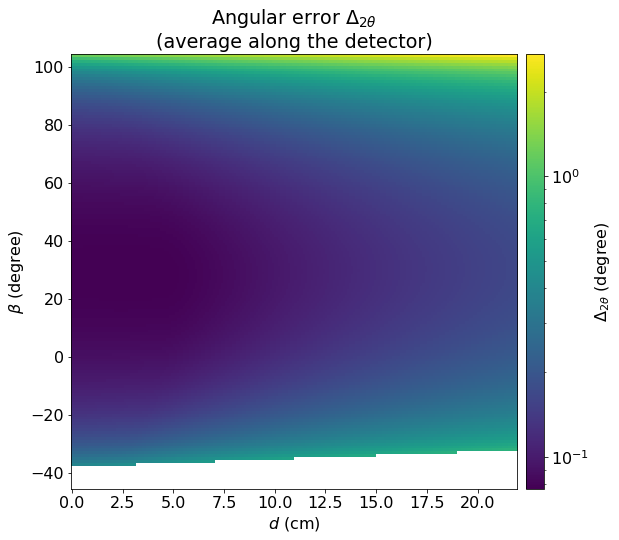

In [19]:
beta_min, beta_max, beta_step = theta_max - 89, theta_min + 89, 1
d_min, d_max, d_step = 0, 22, 0.1   # d (distance of the focus of the source / length of the detector)

###

arr_beta_base = arange(beta_min, beta_max, beta_step)
arr_channel_base = arange(0, n_channels, 5)

### Defocus + cone error ###
# Varying: beta (--> a, s), d, theta (--> channel)

# beta
arr_beta = expand_dims(arr_beta_base, axis = [1, 2])
arr_a, arr_s = a_s_from_beta(arr_beta, L, theta_min, theta_max)
# d
arr_d = expand_dims(arange(d_min, d_max, d_step), axis = [0, 2])
# channel
arr_channel = expand_dims(arr_channel_base, axis = [0, 1])
arr_theta = channel_to_angle(arr_channel, arr_a, arr_s, arr_beta, length_channel)
# error
Delta_p, Delta_theta = error_defocus_and_cone(width_channel, arr_theta, arr_a, arr_s, arr_beta, arr_d, incident, sigma_omega, sigma_psi)
arr_error_cone = Delta_theta

### Resolution error ###
arr_error_resolution = error_resolution(arr_theta, a, s, beta, length_channel)

### Total error
arr_error_total = sqrt(power(arr_error_cone, 2) + power(arr_error_resolution, 2))
arr_error_total = average(arr_error_total, axis = (2))

### Plot ###
fig, ax = subplots(figsize = (8, 8))
im = ax.imshow(arr_error_total,
               norm = LogNorm(),
               extent = (d_min - d_step/2, d_max - d_step/2, beta_min - beta_step/2, beta_max - beta_step/2),
               aspect = 'auto', interpolation = 'none')
cb = colorbar(im, ax = ax, cax = ax.inset_axes([1.02,0, 0.04, 1]), label = r'$\Delta_{2\theta}$ (degree)')
cb.ax.yaxis.set_offset_position('left')
ax.set_xlabel(r'$d$ (cm)')
ax.set_ylabel(r'$\beta$ (degree)')
ax.set_title('Angular error ' + r'$\Delta_{2\theta}$' + '\n(average along the detector)')
show()

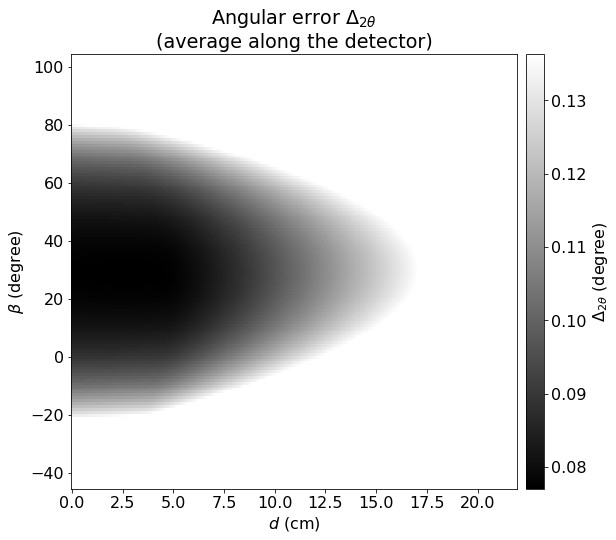

In [20]:
fig, ax = subplots(figsize = (8, 8))

im = ax.imshow(arr_error_total,
               extent = (d_min - d_step/2, d_max - d_step/2, beta_min - beta_step/2, beta_max - beta_step/2),
               aspect = 'auto', interpolation = 'none', cmap = 'gray',
               vmin = nanmin(arr_error_total), vmax = 0.05 * nanmax(arr_error_total))

cb = colorbar(im, ax = ax, cax = ax.inset_axes([1.02,0, 0.04, 1]), label = r'$\Delta_{2\theta}$ (degree)')
cb.ax.yaxis.set_offset_position('left')
ax.set_xlabel(r'$d$ (cm)')
ax.set_ylabel(r'$\beta$ (degree)')
ax.set_title('Angular error ' + r'$\Delta_{2\theta}$' + '\n(average along the detector)')
show()

In [21]:
idx_beta, idx_d = unravel_index(nanargmin(arr_error_total), arr_error_total.shape)
beta_min = arr_beta.flatten()[idx_beta]
d_min = arr_d.flatten()[idx_d]
beta_min, d_min

(29, 2.8000000000000003)

a, s = -2.962, 12.830
beta = 29
d = 2.800 cm
i = 10.5
theta = 30
Df = 7.703 cm
Dp = 0.003 cm (0.538 channels)
Dtheta = 0.012 deg


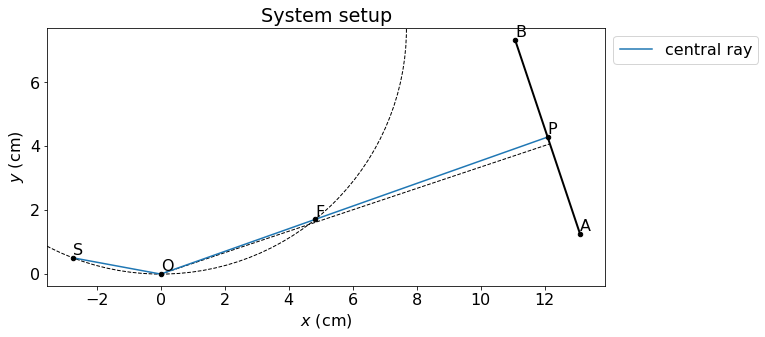

In [26]:
beta_plot = beta_min
d_plot = d_min
omega_plot = sigma_omega   # Deviation angle of the followed secondary ray

### Diffraction ###
#theta = (theta_min + theta_max) / 2
theta = 30

### Plot ###
rcParams['font.size'] = 16
plot_secondary_ray = False

###

a, s = a_s_from_beta(beta_plot, L, theta_min, theta_max)

### Plot system configuration ###

print(f'a, s = {a:.3f}, {s:.3f}')
print(f'beta = {beta_plot}')
print(f'd = {d_plot:.3f} cm')
print(f'i = {incident}')
print(f'theta = {theta}')
Delta_f, Delta_p, Delta_theta = error_defocus(theta, a, s, beta_plot, incident, d_plot, omega_plot)
print(f'Df = {Delta_f:.3f} cm')
print(f'Dp = {Delta_p:.3f} cm ({Delta_p / length_channel:.3f} channels)')
print(f'Dtheta = {Delta_theta:.3f} deg')

### Figure ###
fig, ax = subplots(figsize = (10, 10))
plot_experimental_setting(L, a, s, beta_plot, incident, d_plot, omega_plot, theta, ax, legend = True, secondary_ray = plot_secondary_ray)
show()

theta = 30 deg
p(P') = 3.189 cm
p(P'') = 3.183 cm
p(D') = 3.163 cm
p(D'') = 3.158 cm
Delta p = 0.01537895409137846 cm
Delta p = 0.01537895409137846 cm


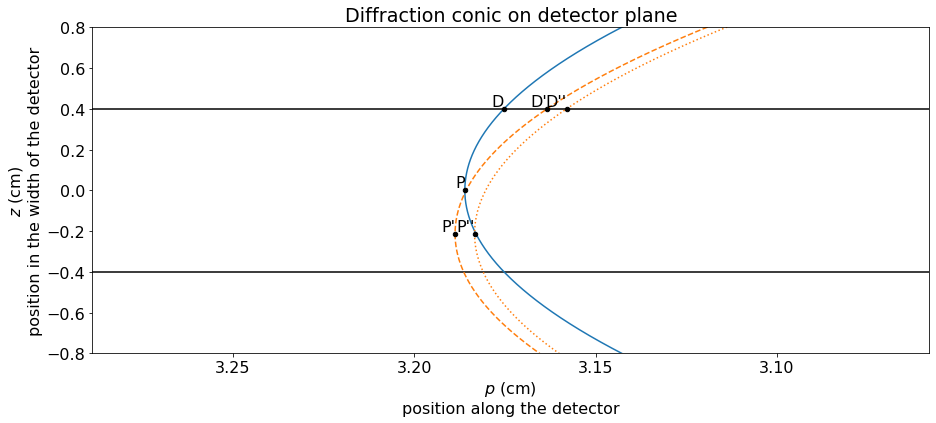

In [27]:
sigma_omega_plot = sigma_omega # 0.67   # Angular disperion of the beam (direction 1)
sigma_psi_plot = sigma_psi   # Angular disperion of the beam (direction 2)

### Calculate intersection curve ###
arr_z = arange(- 20 * width_channel, 20 * width_channel, 0.0001)
arr_p = conic_diffraction_base(arr_z, theta, a, s, beta_plot)
Delta_z = ( d + s / cos(deg2rad(theta - beta_plot)) ) * tan(deg2rad(sigma_psi_plot))
arr_p1 = conic_diffraction(arr_z, theta, a, s, beta_plot, d_plot, incident, sigma_omega_plot, -sigma_psi_plot)
arr_p2 = conic_diffraction(arr_z, theta, a, s, beta_plot, d_plot, incident, -sigma_omega_plot, -sigma_psi_plot)

### Calculate coordinates and distances ###
x_P = angle_to_distance(theta, a, s, beta_plot)
x_D = conic_diffraction_base(width_channel/2, theta, a, s, beta_plot)[0]
x_P1 = conic_diffraction(0, theta, a, s, beta_plot, d_plot, incident, sigma_omega_plot, 0)[0]
x_D1 = conic_diffraction(width_channel/2, theta, a, s, beta_plot, d_plot, incident, sigma_omega_plot, -sigma_psi_plot)[0]
x_P2 = conic_diffraction(0, theta, a, s, beta_plot, d_plot, incident, -sigma_omega_plot, 0)[0]
x_D2 = conic_diffraction(width_channel/2, theta, a, s, beta_plot, d_plot, incident, -sigma_omega_plot, -sigma_psi_plot)[0]
Delta_p = 0.5 * (max(x_P1, x_D1, x_P2, x_D2) - min(x_P1, x_D1, x_P2, x_D2))
Delta_p_alt, _ = error_defocus_and_cone(width_channel, theta, a, s, beta_plot, d_plot, incident, sigma_omega_plot, sigma_psi_plot)

print(f'theta = {theta} deg')
print(f'p(P\') = {x_P1:.3f} cm')
print(f'p(P\'\') = {x_P2:.3f} cm')
print(f'p(D\') = {x_D1:.3f} cm')
print(f'p(D\'\') = {x_D2:.3f} cm')
print(f'Delta p = {Delta_p} cm')
print(f'Delta p = {Delta_p_alt} cm')

### Plot ###
fig, ax = subplots(figsize = (15, 6))
ax.plot([0, 0], [- width_channel/2, width_channel/2], c = 'black')
ax.plot([L, L], [- width_channel/2, width_channel/2], c = 'black')
ax.plot([0, L], [- width_channel/2, - width_channel/2], c = 'black')
ax.plot([0, L], [width_channel/2, width_channel/2], c = 'black')
ax.plot(arr_p[0], arr_z, c = 'tab:blue')
ax.plot(arr_p[1], arr_z, c = 'tab:blue')
ax.plot(arr_p1[0], arr_z, ls = '--', c = 'tab:orange')
ax.plot(arr_p2[0], arr_z, ls = ':', c = 'tab:orange')

ax.scatter(0, 0, c = 'black', s = 20, zorder = 2.5)
ax.annotate('A', (0, 0), ha = 'left', va = 'bottom')
ax.scatter(n_channels * length_channel, 0, c = 'black', s = 20, zorder = 2.5)
ax.annotate('B', (n_channels * length_channel, 0), ha = 'right', va = 'bottom')
list_letters = ['P', 'D', 'P\'', 'D\'', 'P\'\'', 'D\'\'']
list_coords = [(x_P, 0), (x_D, width_channel/2), (x_P1, -Delta_z), (x_D1, width_channel/2), (x_P2, -Delta_z), (x_D2, width_channel/2)]
for letter, coords in zip(list_letters, list_coords):
    ax.scatter(*coords, c = 'black', s = 20, zorder = 2.5)
    ax.annotate(letter, coords, ha = 'right', va = 'bottom')

#ax.set_aspect(1)
x_lim_complete = n_channels * length_channel * array([- 0.1, 1.1])
if (not isnan(x_D2)):
    x_lim_narrow = (x_D2 - 0.1, x_P1 + 0.1)
else:
    x_lim_narrow = (- 0.1 * n_channels * length_channel, x_P1 + 0.05)
#ax.set_xlim(n_channels * length_channel * array([- 0.1, 1.1]))
#ax.set_ylim(- 2 * width_channel, 2 * width_channel)
ax.set_xlim(x_lim_narrow)
ax.set_ylim(- 1 * width_channel, 1 * width_channel)

ax.invert_xaxis()
ax.set_xlabel(r'$p$ (cm)' + '\nposition along the detector')
ax.set_ylabel(r'$z$ (cm)' + '\nposition in the width of the detector')
ax.set_title('Diffraction conic on detector plane')
show()

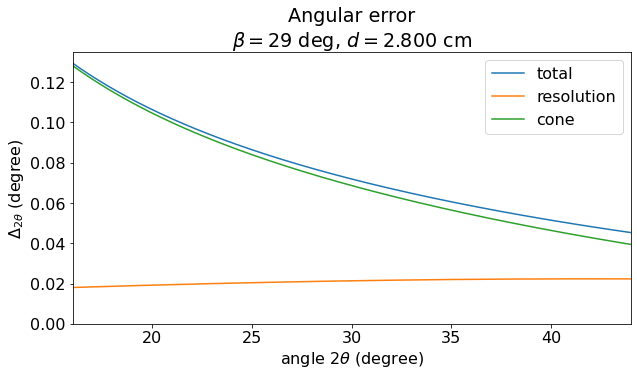

In [28]:
arr_channel_base = arange(0, n_channels, 1)
arr_theta_base = channel_to_angle(arr_channel_base, a, s, beta_plot, length_channel)

### Error from cone ###
# Varying: beta (--> a, s), theta (--> channel)
arr_theta = arr_theta_base
Delta_p, Delta_theta = error_defocus_and_cone(width_channel, arr_theta, a, s, beta_plot, d_plot, incident, sigma_omega, sigma_psi)
arr_error_cone = Delta_theta

### Error from defocus ###
# Varying: channel (--> theta)
arr_theta = arr_theta_base
arr_error_resolution = error_resolution(arr_theta, a, s, beta, length_channel)

### Total error ###
arr_error_total = sqrt(power(arr_error_cone, 2) + power(arr_error_resolution, 2))

###

fig, ax = subplots(figsize = (10, 5))
ax.plot(arr_theta_base, arr_error_total, label = 'total')
ax.plot(arr_theta_base, arr_error_resolution, label = 'resolution')
ax.plot(arr_theta_base, arr_error_cone, label = 'cone')
ax.legend(frameon = True)
ax.set_xlim(theta_min, theta_max)
ax.set_ylim(0, None)
ax.set_xlabel(r'angle $2 \theta$ (degree)')
ax.set_ylabel(r'$\Delta_{2\theta}$ (degree)')
ax.set_title('Angular error\n' + r'$\beta = $' + f'{beta_plot} deg' + r', $d = $' + f'{d_plot:.3f} cm')
show()